In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import config
config.config_visuals()

In [2]:
merged_ccle_info = pd.read_csv("../data/supplementary/S1_merged-ccle-info.txt", sep="\t", index_col=0)

In [7]:
tp53_nomut = merged_ccle_info["TP53_mutation_classification_collapsed"].isin(["WT","silent"])
tp53_nocn = merged_ccle_info["TP53_copynumber"]>0.75

tp53_wt = merged_ccle_info[tp53_nomut&tp53_nocn]

In [9]:
def classify_rpl22_cn(row):
    rpl22_mut = row["RPL22_mutation_classification_collapsed"]
    rpl22_cn = row["RPL22_copynumber"]
    if rpl22_mut == "damaging":
        return "RPL22 truncated"
    if rpl22_cn < 0.75:
        return "RPL22 deleted"
    return "RPL22 WT"


rpl22_select = tp53_wt.dropna(
    subset=["RPL22_mutation_classification_collapsed", "RPL22_copynumber"], axis=0
).copy(deep=True)
rpl22_select["RPL22_status"] = rpl22_select.apply(classify_rpl22_cn, axis=1)

/Users/khu/Library/Caches/pypoetry/virtualenvs/khu-bJ_CKhNZ-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khu/Library/Caches/pypoetry/virtualenvs/khu-bJ_CKhNZ-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


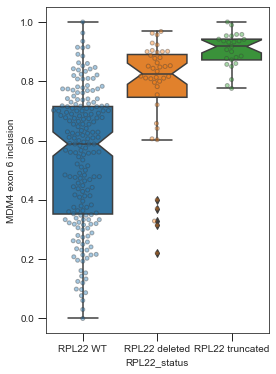

In [20]:
plt.figure(figsize=(4, 6))

sns.boxplot(
    rpl22_select["RPL22_status"],
    rpl22_select["MDM4_3p_chr1_204506558_204506625_ENSG00000198625.8_exonusage"],
    notch=True,
)

sns.swarmplot(
    rpl22_select["RPL22_status"],
    rpl22_select["MDM4_3p_chr1_204506558_204506625_ENSG00000198625.8_exonusage"],
    linewidth=1,
    alpha=0.4,
    s=4
)

plt.ylabel("MDM4 exon 6 inclusion")

plt.savefig("/Users/khu/Desktop/TP53-WT_RPL22_vs_MDM4-6-inclusion.pdf",transparent=True,bbox_inches="tight")


/Users/khu/Library/Caches/pypoetry/virtualenvs/khu-bJ_CKhNZ-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khu/Library/Caches/pypoetry/virtualenvs/khu-bJ_CKhNZ-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


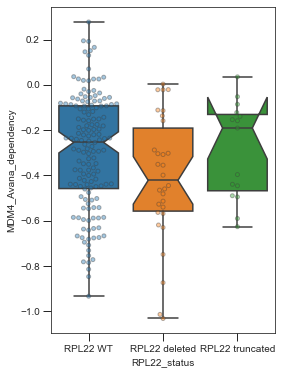

In [19]:

plt.figure(figsize=(4, 6))

sns.boxplot(
    rpl22_select["RPL22_status"], rpl22_select["MDM4_Avana_dependency"], notch=True
)

sns.swarmplot(
    rpl22_select["RPL22_status"],
    rpl22_select["MDM4_Avana_dependency"],
    linewidth=1,
    alpha=0.4,
    s=4
)

plt.savefig("/Users/khu/Desktop/TP53-WT_RPL22_vs_MDM4-Avana.pdf",transparent=True,bbox_inches="tight")

/Users/khu/Library/Caches/pypoetry/virtualenvs/khu-bJ_CKhNZ-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khu/Library/Caches/pypoetry/virtualenvs/khu-bJ_CKhNZ-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


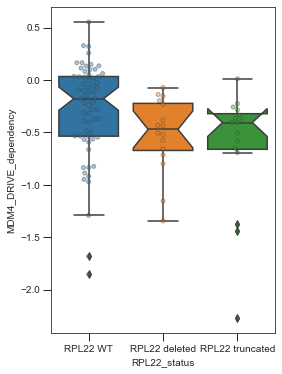

In [18]:
plt.figure(figsize=(4, 6))

sns.boxplot(
    rpl22_select["RPL22_status"], rpl22_select["MDM4_DRIVE_dependency"], notch=True
)

sns.swarmplot(
    rpl22_select["RPL22_status"],
    rpl22_select["MDM4_DRIVE_dependency"],
    linewidth=1,
    alpha=0.4,
    s=4
)

plt.savefig("/Users/khu/Desktop/TP53-WT_RPL22_vs_MDM4-DRIVE.pdf",transparent=True,bbox_inches="tight")

/Users/khu/Library/Caches/pypoetry/virtualenvs/khu-bJ_CKhNZ-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khu/Library/Caches/pypoetry/virtualenvs/khu-bJ_CKhNZ-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


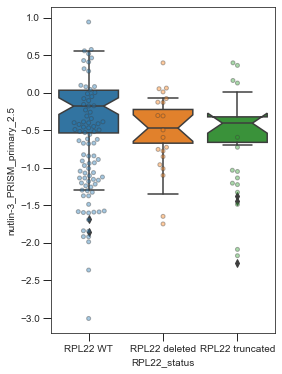

In [22]:
plt.figure(figsize=(4, 6))

sns.boxplot(
    rpl22_select["RPL22_status"], rpl22_select["MDM4_DRIVE_dependency"], notch=True
)

sns.swarmplot(
    rpl22_select["RPL22_status"],
    rpl22_select["nutlin-3_PRISM_primary_2.5"],
    linewidth=1,
    alpha=0.4,
    s=4
)

plt.savefig("/Users/khu/Desktop/TP53-WT_RPL22_vs_nutlin-3_PRISM_primary_2.5.pdf",transparent=True,bbox_inches="tight")